In [156]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sn

In [174]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submit.csv")
# 删除id
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)
# 取出训练集的y
#y_train = train.pop('y')


In [112]:
#将训练集中3倍方差以外的数据除去
'''train = train[np.abs(train['y'] -train['y'].mean()) <= (3 * train['y'].std())]
train'''

city  hour  is_workday  weather  temp_1  temp_2  wind    y
0        0    22           1        2     3.0     0.7     0   15
1        0    10           1        1    21.0    24.9     3   48
2        0     0           1        1    25.3    27.4     0   21
3        0     7           0        1    15.7    16.2     0   11
4        1    10           1        1    21.1    25.0     2   39
5        1     0           1        1    20.4    18.2     0   12
6        0     0           1        1    13.0    13.3     2   11
7        0    15           1        1    29.5    30.9     2   67
8        0    15           1        2    10.4    10.6     3   77
9        1     4           1        3    17.4    18.0     3    2
10       1     0           1        1    14.9    15.3     2    6
11       1     8           0        1    25.0    28.1     0   25
12       0    21           0        2     8.7     8.8     0   52
13       0     5           1        3    14.5    14.9     1    8
14       1     3           1        1    25.4    28.6     1    0
15       0    23           0        2    24.2    26.2     0   53
16       1    14           0        1     7.0     5.0     1   49
17       1    17           1        1     7.5     3.5     2   75
18       1     1           1        1    18.0    18.7     3    5
19       1     7           0        2    22.8    24.8     1   13
20       0     9           0        1    24.5    26.6     0   67
21       0    16           1        3    11.0    11.2     2   76
22       0     5           1        2    13.3    13.7     0   10
23       0     8           1        1    -0.3    -3.8     1  113
24       0    22           1        1    18.5    19.2     0   43
25       1     0           1        1    20.9    19.8     1   11
26       0     6           1        2     8.1     4.1     2   29
27       0     5           1        1     2.5    -1.8     2    7
28       0     8           1        1    22.3    22.2     0  187
29       1    22           1        1    28.1    32.4     2   42
...    ...   ...         ...      ...     ...     ...   ...  ...
9970     0    10           1        2     7.0     5.0     1   41
9971     1    10           1        1    30.5    34.0     1   33
9972     0    16           0        1    24.5    25.6     2  162
9973     0    21           1        1    27.3    31.6     2   86
9974     0    18           0        2    24.0    26.0     3   98
9975     1    15           1        1    22.7    24.7     1   61
9976     1    11           1        1    13.0    13.3     1   36
9977     1    17           0        1    25.0    27.1     2   91
9978     0     5           1        1    12.9    13.2     0    7
9979     0     1           1        3     5.6     1.5     3    2
9980     0    10           1        3    17.4    18.0     0   22
9981     0    16           1        1    20.3    23.1     1  126
9982     0    17           0        1    17.6    18.2     2  186
9983     0     7           1        3     6.0     3.9     1   73
9984     1     4           1        1    12.9    13.2     0    1
9985     1    17           1        1     7.0     6.0     1  113
9986     1     5           1        2    20.4    20.2     0    8
9987     1     6           1        1    11.1    11.3     0   16
9988     1    19           0        1    18.4    19.1     0   71
9989     0    17           1        1    10.4    10.6     2  109
9990     1    23           1        2    19.2    19.9     1   44
9991     1    19           1        1    25.1    26.2     2  124
9992     0     1           1        1    11.5    11.8     4    1
9993     1     5           1        3    13.7    14.1     2    1
9994     0     0           0        1    16.3    16.9     0   37
9995     0     4           0        2     8.3     7.3     0    2
9996     1     5           0        1    22.3    22.2     0    1
9997     1     0           0        1     9.6     9.7     0   11
9998     0    18           0        2    27.4    29.7     1  105
9999     0     9           1        2    

#  一、数据预览

In [168]:
train.info()#查看是否有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
city          10000 non-null int64
hour          10000 non-null int64
is_workday    10000 non-null int64
weather       10000 non-null int64
temp_1        10000 non-null float64
temp_2        10000 non-null float64
wind          10000 non-null int64
y             10000 non-null int64
dtypes: float64(2), int64(6)
memory usage: 625.1 KB


In [169]:
#查看是否有重复值
d=0
for i in train.duplicated():
    if i !=False:
        d+=1
print("d:",d)

d: 14


In [115]:
#train.drop_duplicates(subset=['city'], keep='first')
train=train.drop_duplicates( keep='first')#删除重复值

In [116]:
train.describe()#重要指标查看

city         hour   is_workday      weather      temp_1  \
count  9873.000000  9873.000000  9873.000000  9873.000000  9873.00000   
mean      0.505520    11.481009     0.680340     1.430771    15.16376   
std       0.499995     6.920821     0.466368     0.639316     9.01653   
min       0.000000     0.000000     0.000000     1.000000    -7.60000   
25%       0.000000     6.000000     0.000000     1.000000     7.70000   
50%       1.000000    11.000000     1.000000     1.000000    15.40000   
75%       1.000000    17.000000     1.000000     2.000000    22.50000   
max       1.000000    23.000000     1.000000     4.000000    38.60000   

            temp_2         wind            y  
count  9873.000000  9873.000000  9873.000000  
mean     15.193680     1.245721    48.719943  
std      11.300911     1.096715    44.771761  
min     -15.600000     0.000000     0.000000  
25%       5.700000     0.000000    10.000000  
50%      15.800000     1.000000    38.000000  
75%      24.700000     2.000000    73.000000  
max      46.800000     7.000000   193.000000

# 二、特征分析

In [117]:
#查看每个特征的重要性
from sklearn.feature_selection import f_regression
x_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
F=f_regression(x_train,y_train)
F

(array([1.90947506e+02, 1.97111170e+03, 1.82430783e-01, 2.09102706e+02,
        1.99864188e+03, 1.96755690e+03, 1.09832920e+02]),
 array([4.96145036e-43, 0.00000000e+00, 6.69301849e-01, 6.49259279e-47,
        0.00000000e+00, 0.00000000e+00, 1.45175622e-25]))

In [118]:
#查看预测结果小于0的个数
t = pd.read_csv("my_XGB.csv")
g=0
for i in t['y']:
    if i ==0:
        g+=1
g

140

In [119]:
#查看特征之间的相关性
train.corr()

city      hour  is_workday   weather    temp_1    temp_2  \
city        1.000000  0.012889    0.008871  0.013317 -0.046934 -0.044079   
hour        0.012889  1.000000    0.011928 -0.024353  0.127564  0.125000   
is_workday  0.008871  0.011928    1.000000  0.043661  0.047755  0.047080   
weather     0.013317 -0.024353    0.043661  1.000000 -0.102788 -0.106136   
temp_1     -0.046934  0.127564    0.047755 -0.102788  1.000000  0.987276   
temp_2     -0.044079  0.125000    0.047080 -0.106136  0.987276  1.000000   
wind        0.013228  0.130069    0.000098  0.027298 -0.010082 -0.045865   
y          -0.137758  0.407982    0.004299 -0.144028  0.410345  0.407675   

                wind         y  
city        0.013228 -0.137758  
hour        0.130069  0.407982  
is_workday  0.000098  0.004299  
weather     0.027298 -0.144028  
temp_1     -0.010082  0.410345  
temp_2     -0.045865  0.407675  
wind        1.000000  0.104902  
y           0.104902  1.000000

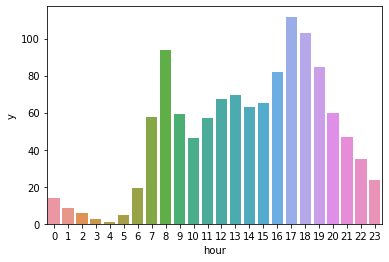

In [120]:
#查看不同时间段对应借车的数量
sn.barplot(data=train,x='hour',y='y',ci=None)

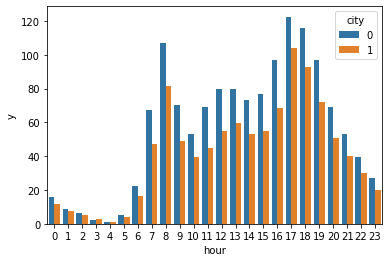

In [121]:
#查看不同时间段不同城市对应的借车数量
sn.barplot(data=train,x='hour',y='y',ci=None,hue='city')

In [170]:
train.groupby('hour').sum()

city  is_workday  weather  temp_1  temp_2  wind      y
hour                                                        
0      214         280      571  5864.2  5817.6   395   5837
1      204         281      583  5517.4  5375.4   401   3462
2      193         278      595  5631.2  5525.0   406   2349
3      210         279      595  5481.3  5296.8   395   1084
4      182         263      545  4998.2  4822.0   358    387
5      204         286      602  5088.7  4863.3   343   1930
6      225         297      645  5439.1  5152.3   399   8579
7      193         283      617  5312.0  5139.0   423  23771
8      209         283      607  5408.8  5255.6   475  39942
9      218         276      620  5902.7  5839.5   513  24780
10     213         292      629  6675.9  6688.4   598  19623
11     208         276      609  6956.3  7066.7   603  23779
12     207         285      605  7265.3  7428.1   641  28089
13     199         258      576  7009.4  7234.9   614  27796
14     235         312      660  8211.0  8471.2   732  28608
15     209         291      578  7617.8  7933.6   673  26482
16     228         296      616  7778.6  8056.4   725  35223
17     205         269      573  7109.4  7303.1   658  49761
18     213         304      591  7465.9  7600.0   688  49809
19     210         295      584  7141.9  7309.9   625  35862
20     202         276      545  6095.1  6140.8   506  24136
21     209         294      560  6442.8  6601.2   464  19447
22     201         295      585  6300.1  6323.6   485  14927
23     207         291      584  5968.8  5967.9   366   9711

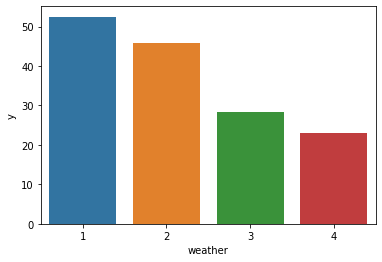

In [122]:
#查看不同的天气状况下对应的借车数量
sn.barplot(data=train,x='weather',y='y',ci=None)

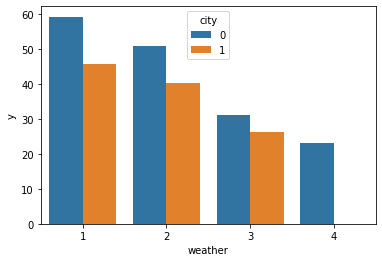

In [123]:
#查看不同天气状况不同的城市对应的借车数量
sn.barplot(data=train,x='weather',y='y',ci=None,hue='city')
#这里我们发现了在天气状况为4时,1城市无人借车，我们进一步进行探讨

In [124]:
train.groupby(['weather','city']).sum().sort_values('y',ascending=False)
#从这里我们可以看出在天气状况为4时，借车的数量是极少的，所以试试将天气状况为4时，借车数量设为0

hour  is_workday   temp_1   temp_2  wind       y
weather city                                                   
1       0     37004        2098  51752.3  52617.3  4000  188193
        1     38029        2184  49914.6  50352.8  4050  149109
2       0     14521         957  19670.6  19561.0  1483   69186
        1     14371         892  17776.4  17455.9  1529   51772
3       1      5342         340   5902.5   5564.2   710   11837
        0      4066         245   4696.0   4464.6   526   10869
4       0        19           1     -0.6     -8.6     1      46

In [125]:
#对天气状况为4时，进行其他因素深度分析，发现只有两个时间段才有人借车，所以初步判断为特殊情况，接下来查看测试集中，是否有类似的特殊情况
train.groupby(['weather','hour','temp_1']).sum().tail(20)

city  is_workday  temp_2  wind   y
weather hour temp_1                                    
3       23    15.6      1           1    16.1     1  35
              17.2      1           0    17.8     0  12
              17.3      1           1    17.9     0  16
              17.6      1           1    18.2     2  17
              19.7      1           1    20.4     0  16
              19.8      1           0    20.6     0   8
              20.2      0           1    18.0     2  17
              20.4      0           1    22.2     1  18
              20.6      1           1    19.5     1   7
              20.7      0           0    21.6     1  23
              21.2      0           1    20.1     0  12
              21.4      1           2    40.6     1  18
              21.7      0           1    -0.4     2  30
              22.6      1           1    24.6     1  19
              22.8      0           0    46.6     1  70
              23.8      0           0    25.8     0  30
              24.8      1           0    27.9     2  32
              28.6      0           0    30.9     1  28
4       1    -1.6       0           0    -7.2     1   5
        18    1.0       0           1    -1.4     0  41

In [126]:
test.groupby(['weather','hour','temp_1']).sum().tail(20)

city  is_workday  temp_2  wind
weather hour temp_1                                
3       23   5.6        1           1     1.5     2
             7.9        1           0     3.9     3
             8.2        1           1     6.2     1
             8.3        0           1     5.3     2
             8.4        0           0     4.5     4
             10.4       1           1    10.6     1
             10.6       0           1    10.8     2
             11.2       1           1    11.4     0
             12.1       0           0    12.4     3
             17.4       0           1    18.0     0
             17.9       1           0    18.6     3
             18.2       0           1    18.9     0
             19.4       1           0    20.1     0
             19.7       1           2    42.0     4
             20.1       0           1    41.8     4
             22.7       0           1    22.7     2
             23.4       0           1    23.4     2
             25.9       1           1    30.1     1
             30.6       0           1    39.1     1
4       16   2.7        1           1    -2.6     2

In [129]:
#将天气状况为weather=4,借车数量变为5
train.loc[train['weather']==4,'y']=5

In [130]:
train.groupby(['weather','city']).sum().sort_values('y',ascending=False)

hour  is_workday   temp_1   temp_2  wind       y
weather city                                                   
1       0     37004        2098  51752.3  52617.3  4000  188193
        1     38029        2184  49914.6  50352.8  4050  149109
2       0     14521         957  19670.6  19561.0  1483   69186
        1     14371         892  17776.4  17455.9  1529   51772
3       1      5342         340   5902.5   5564.2   710   11837
        0      4066         245   4696.0   4464.6   526   10869
4       0        19           1     -0.6     -8.6     1      10

In [131]:
train.groupby(['temp_1']).sum().sort_values('y',ascending=False).tail(50)

city  hour  is_workday  weather  temp_2  wind   y
temp_1                                                   
-7.6       1    21           2        3   -41.5     4  95
-1.9       7    61           5       13   -41.5     9  89
 0.2       6    73           7       10   -26.7    10  89
 36.0      1    26           2        2    85.6     3  88
 37.0      0    12           0        1    40.9     3  86
-0.8       7   109           5       18   -46.7    10  85
 35.7      0    10           0        1    41.5     2  82
-2.0       3    32           3        6   -36.0     8  79
-2.5       2    41           2        3   -20.3     5  79
-2.8       5    58           2        8   -53.6    14  78
 34.9      0    20           1        1    42.7     2  78
 38.6      0    16           0        1    40.6     1  74
 36.2      1    13           0        1    42.0     1  73
-2.6       3    53           3        8   -48.4     7  59
 36.3      0    13           1        1    40.1     0  51
-5.8       1    10           1        2   -22.4     1  48
-2.4       3    58           4        4   -32.0     8  47
 36.7      0    14           1        1    42.5     2  43
-2.9       3    51           1        7   -41.9     8  40
-3.1       3    41           2        3   -27.4     6  40
-3.6       3    11           2        3   -30.9     7  32
 35.9      1    15           1        1    38.7     1  31
-5.0       1     9           1        1    -5.8     0  30
-3.7       1    13           1        4   -31.2     9  28
-3.4       0    19           1        3   -16.2     1  28
-4.4       2    20           0        2   -15.4     1  26
-6.7       1     7           1        1    -7.6     0  25
-5.5       1    12           0        2    -9.3     0  21
-2.1       2    14           2        3   -19.1     3  21
-3.3       3    22           2        4   -35.0     5  18
-4.8       1    11           0        2   -10.6     1  18
-3.2       1    39           2        3   -24.7     3  18
-6.1       3    12           1        3   -39.0     4  18
-6.3       2    13           0        4   -26.4     3  17
-4.2       1    23           0        4   -23.0     5  13
-6.6       1    28           1        2   -24.0     1  12
-5.3       1    22           0        1    -6.1     0   9
-3.8       1    13           1        2   -14.1     1   9
-3.0       3    14           2        3   -23.1     5   8
-5.7       2     1           0        3   -29.2     5   6
-4.3       0     8           0        1   -11.1     2   5
-5.1       1     0           1        1   -11.9     1   2
-4.6       0     0           1        1   -12.4     2   1
-4.5       1     5           1        1    -8.3     0   1
-5.9       0     1           1        1   -13.8     2   0
-5.6       2     7           1        3   -23.0     1   0
-4.9       1     3           1        1   -10.7     1   0
-4.1       1     5           0        1    -9.9     1   0
-7.0       1     4           0        2   -14.9     2   0
-7.1       0     2           1        1   -15.0     2   0

In [132]:
train.groupby(['temp_1','city']).sum().sort_values('y',ascending=False).tail(50)

hour  is_workday  weather  temp_2  wind   y
temp_1 city                                             
-3.4   0       19           1        3   -16.2     1  28
-1.1   0       34           1        4   -21.1     5  28
-3.7   0       12           0        3   -21.8     7  26
-4.4   1       20           0        2   -15.4     1  26
-6.7   1        7           1        1    -7.6     0  25
-2.9   0        6           1        4   -19.2     5  22
 0.0   0        6           1        1    -3.5     1  22
-2.5   0       10           0        1    -9.1     3  22
-2.1   0        6           1        1    -6.7     1  21
-5.5   1       12           0        2    -9.3     0  21
-6.1   1       12           1        3   -39.0     4  18
-2.9   1       45           0        3   -22.7     3  18
-4.8   1       11           0        2   -10.6     1  18
 0.2   0       18           3        3   -14.9     7  17
-6.3   1       13           0        4   -26.4     3  17
-1.6   0       15           0        6   -18.6     1  16
-3.3   0        9           0        1   -10.0     2  15
 9.7   1        7           2        2    19.6     5  14
-3.2   1       10           1        1    -6.9     0  12
-2.6   0       21           1        4   -25.8     2   9
-6.6   1       23           0        1   -11.5     0   9
-5.3   1       22           0        1    -6.1     0   9
-4.2   1       22           0        1   -10.0     1   8
-3.0   1       14           2        3   -23.1     5   8
-5.7   1        1           0        3   -29.2     5   6
-3.2   0       29           1        2   -17.8     3   6
-2.8   0       23           0        3   -11.4     4   5
 0.6   0        3           0        2    -4.9     2   5
-4.3   0        8           0        1   -11.1     2   5
-3.8   1        6           1        1    -4.5     0   5
-4.2   0        1           0        3   -13.0     4   5
-3.8   0        7           0        1    -9.6     1   4
-5.8   1        1           0        1   -10.7     0   3
-6.6   0        5           1        1   -12.5     1   3
-3.3   1       13           2        3   -25.0     3   3
-0.8   0       12           0        5   -10.6     2   2
-3.7   1        1           1        1    -9.4     2   2
-5.1   1        0           1        1   -11.9     1   2
-7.6   1        7           0        1   -15.5     2   2
-4.6   0        0           1        1   -12.4     2   1
-4.5   1        5           1        1    -8.3     0   1
-7.0   1        4           0        2   -14.9     2   0
-2.1   1        8           1        2   -12.4     2   0
-7.1   0        2           1        1   -15.0     2   0
-5.9   0        1           1        1   -13.8     2   0
-1.8   0        4           1        1    -5.4     0   0
-2.4   0        4           1        1    -5.0     0   0
-4.9   1        3           1        1   -10.7     1   0
-5.6   1        7           1        3   -23.0     1   0
-4.1   1        5           0        1    -9.9     1   0

city  hour  is_workday  weather  temp_1  temp_2  wind    y
0        0    22           1        2     3.0     0.7     0   15
1        0    10           1        1    21.0    24.9     3   48
2        0     0           1        1    25.3    27.4     0   21
3        0     7           0        1    15.7    16.2     0   11
4        1    10           1        1    21.1    25.0     2   39
5        1     0           1        1    20.4    18.2     0   12
6        0     0           1        1    13.0    13.3     2   11
7        0    15           1        1    29.5    30.9     2   67
8        0    15           1        2    10.4    10.6     3   77
9        1     4           1        3    17.4    18.0     3    2
10       1     0           1        1    14.9    15.3     2    6
11       1     8           0        1    25.0    28.1     0   25
12       0    21           0        2     8.7     8.8     0   52
13       0     5           1        3    14.5    14.9     1    8
14       1     3           1        1    25.4    28.6     1    0
15       0    23           0        2    24.2    26.2     0   53
16       1    14           0        1     7.0     5.0     1   49
17       1    17           1        1     7.5     3.5     2   75
18       1     1           1        1    18.0    18.7     3    5
19       1     7           0        2    22.8    24.8     1   13
20       0     9           0        1    24.5    26.6     0   67
21       0    16           1        3    11.0    11.2     2   76
22       0     5           1        2    13.3    13.7     0   10
23       0     8           1        1    -0.3    -3.8     1  113
24       0    22           1        1    18.5    19.2     0   43
25       1     0           1        1    20.9    19.8     1   11
26       0     6           1        2     8.1     4.1     2   29
27       0     5           1        1     2.5    -1.8     2    7
29       1    22           1        1    28.1    32.4     2   42
30       0     4           0        1     6.8     3.8     2    0
...    ...   ...         ...      ...     ...     ...   ...  ...
9969     1     7           0        1     3.0    -1.3     1    6
9970     0    10           1        2     7.0     5.0     1   41
9971     1    10           1        1    30.5    34.0     1   33
9972     0    16           0        1    24.5    25.6     2  162
9973     0    21           1        1    27.3    31.6     2   86
9974     0    18           0        2    24.0    26.0     3   98
9975     1    15           1        1    22.7    24.7     1   61
9976     1    11           1        1    13.0    13.3     1   36
9977     1    17           0        1    25.0    27.1     2   91
9978     0     5           1        1    12.9    13.2     0    7
9979     0     1           1        3     5.6     1.5     3    2
9980     0    10           1        3    17.4    18.0     0   22
9981     0    16           1        1    20.3    23.1     1  126
9983     0     7           1        3     6.0     3.9     1   73
9984     1     4           1        1    12.9    13.2     0    1
9985     1    17           1        1     7.0     6.0     1  113
9986     1     5           1        2    20.4    20.2     0    8
9987     1     6           1        1    11.1    11.3     0   16
9988     1    19           0        1    18.4    19.1     0   71
9989     0    17           1        1    10.4    10.6     2  109
9990     1    23           1        2    19.2    19.9     1   44
9991     1    19           1        1    25.1    26.2     2  124
9992     0     1           1        1    11.5    11.8     4    1
9993     1     5           1        3    13.7    14.1     2    1
9994     0     0           0        1    16.3    16.9     0   37
9995     0     4           0        2     8.3     7.3     0    2
9996     1     5           0        1    22.3    22.2     0    1
9997     1     0           0        1     9.6     9.7     0   11
9998     0    18           0        2    27.4    29.7     1  105
9999     0     9           1        2    

In [107]:
train.groupby(['temp_1','city']).sum().sort_values('y',ascending=False).tail(50)
#可以看出在温度比较低和高时借车数量骤减，符合常理

hour  is_workday  weather  temp_2  wind   y
temp_1 city                                             
-3.4   0       19           1        3   -16.2     1  28
-1.1   0       34           1        4   -21.1     5  28
-3.7   0       12           0        3   -21.8     7  26
-4.4   1       20           0        2   -15.4     1  26
-6.7   1        7           1        1    -7.6     0  25
-2.5   0       10           0        1    -9.1     3  22
-2.9   0        6           1        4   -19.2     5  22
 0.0   0        6           1        1    -3.5     1  22
-5.5   1       12           0        2    -9.3     0  21
-2.1   0        6           1        1    -6.7     1  21
-4.8   1       11           0        2   -10.6     1  18
-2.9   1       45           0        3   -22.7     3  18
-6.1   1       12           1        3   -39.0     4  18
-6.3   1       13           0        4   -26.4     3  17
 0.2   0       18           3        3   -14.9     7  17
-1.6   0       15           0        6   -18.6     1  16
-3.3   0        9           0        1   -10.0     2  15
 9.7   1        7           2        2    19.6     5  14
-3.2   1       10           1        1    -6.9     0  12
-2.6   0       21           1        4   -25.8     2   9
-5.3   1       22           0        1    -6.1     0   9
-6.6   1       23           0        1   -11.5     0   9
-4.2   1       22           0        1   -10.0     1   8
-3.0   1       14           2        3   -23.1     5   8
-3.2   0       29           1        2   -17.8     3   6
-5.7   1        1           0        3   -29.2     5   6
-3.8   1        6           1        1    -4.5     0   5
 0.6   0        3           0        2    -4.9     2   5
-2.8   0       23           0        3   -11.4     4   5
-4.2   0        1           0        3   -13.0     4   5
-4.3   0        8           0        1   -11.1     2   5
-3.8   0        7           0        1    -9.6     1   4
-5.8   1        1           0        1   -10.7     0   3
-6.6   0        5           1        1   -12.5     1   3
-3.3   1       13           2        3   -25.0     3   3
-0.8   0       12           0        5   -10.6     2   2
-7.6   1        7           0        1   -15.5     2   2
-5.1   1        0           1        1   -11.9     1   2
-3.7   1        1           1        1    -9.4     2   2
-4.5   1        5           1        1    -8.3     0   1
-4.6   0        0           1        1   -12.4     2   1
-5.9   0        1           1        1   -13.8     2   0
-5.6   1        7           1        3   -23.0     1   0
-2.4   0        4           1        1    -5.0     0   0
-2.1   1        8           1        2   -12.4     2   0
-7.0   1        4           0        2   -14.9     2   0
-7.1   0        2           1        1   -15.0     2   0
-4.9   1        3           1        1   -10.7     1   0
-1.8   0        4           1        1    -5.4     0   0
-4.1   1        5           0        1    -9.9     1   0

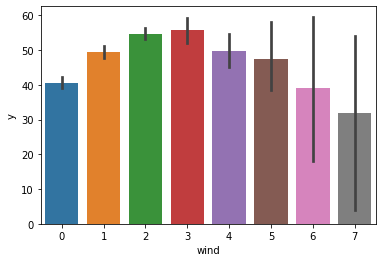

In [135]:
#查看不同风速下对应的借车数量
sn.barplot(data=train,x='wind',y='y')

In [180]:
train.groupby(['wind','weather']).sum().sort_values('y',ascending=False)

city   hour  is_workday   temp_1   temp_2       y
wind weather                                                   
2    1        1001  25342        1353  34043.0  34401.4  131088
1    1         886  21673        1220  30349.9  30925.3  100548
0    1        1026  20765        1342  30587.1  31921.8   85927
1    2         415   9265         568  12225.6  12173.0   40479
0    2         387   8477         619  12030.5  12209.5   36682
2    2         381   8758         529  10484.9  10063.1   35622
3    1         225   5486         295   6163.3   5833.3   27082
4    1         101   2856         150   2661.7   2321.3   12066
2    3         153   3048         201   3453.2   3254.1    8127
3    2          72   1729          96   2040.2   1965.5    7523
1    3         122   2426         163   3024.0   2908.8    6425
0    3          98   2164         138   2331.3   2264.4    4606
4    2          31    758          45    843.9    805.5    3075
3    3          49    984          53   1078.4    975.8    2186
5    1          15    479          19    340.4    263.1    1438
4    3          22    591          22    509.5    419.7     860
5    3           7    180          10    187.0    188.9     661
     2           3    135           9    193.1    204.1     563
6    1           2     81           6     76.5     69.4     271
7    3           2     35           0     51.3     54.6      58
0    4           0     18           1      1.0     -1.4      41
7    1           0     21           1     11.4     11.7      38
1    4           0      1           0     -1.6     -7.2       5
6    2           0      3           0     -3.7    -13.4       3

In [177]:
test.groupby('wind').sum()

city   hour  is_workday  weather   temp_1   temp_2
wind                                                    
0     1022  20960        1429     2887  31516.1  32636.7
1      978  23954        1433     2961  32996.2  33409.4
2     1083  26178        1411     3042  33341.0  32956.0
3      238   6144         317      663   6662.7   6246.2
4      117   3168         158      328   3142.2   2705.3
5       17    466          18       54    373.0    291.0
6        2     21           1        4     14.3     -1.3
7        2     32           1        4     43.7     47.5

In [143]:
test.groupby(['wind','is_workday']).sum()

city   hour  weather   temp_1   temp_2
wind is_workday                                        
0    0            328   6698      853   9418.2   9756.7
     1            694  14262     2034  22097.9  22880.0
1    0            320   7428      891   9624.4   9576.3
     1            658  16526     2070  23371.8  23833.1
2    0            332   8734      955  10705.0  10518.4
     1            751  17444     2087  22636.0  22437.6
3    0             67   2029      214   2020.1   1824.8
     1            171   4115      449   4642.6   4421.4
4    0             42   1090      111    923.4    754.1
     1             75   2078      217   2218.8   1951.2
5    0              7    195       24    128.0     76.0
     1             10    271       30    245.0    215.0
6    0              1     19        3      9.4      0.0
     1              1      2        1      4.9     -1.3
7    0              1     17        3     29.9     33.3
     1              1     15        1     13.8     14.2

In [145]:
train.describe()

city         hour   is_workday      weather      temp_1  \
count  9873.000000  9873.000000  9873.000000  9873.000000  9873.00000   
mean      0.505520    11.481009     0.680340     1.430771    15.16376   
std       0.499995     6.920821     0.466368     0.639316     9.01653   
min       0.000000     0.000000     0.000000     1.000000    -7.60000   
25%       0.000000     6.000000     0.000000     1.000000     7.70000   
50%       1.000000    11.000000     1.000000     1.000000    15.40000   
75%       1.000000    17.000000     1.000000     2.000000    22.50000   
max       1.000000    23.000000     1.000000     4.000000    38.60000   

            temp_2         wind            y  
count  9873.000000  9873.000000  9873.000000  
mean     15.193680     1.245721    48.716297  
std      11.300911     1.096715    44.773856  
min     -15.600000     0.000000     0.000000  
25%       5.700000     0.000000    10.000000  
50%      15.800000     1.000000    38.000000  
75%      24.700000     2.000000    73.000000  
max      46.800000     7.000000   193.000000

In [167]:
train.loc[np.abs(train['y']-train['y'].mean())>(3*train['y'].std())]['hour']

82      18
122     18
161     18
196     17
227     18
249     17
349      8
385     18
550     18
612     18
639     17
660      8
772     17
779     17
873     18
961     17
962     18
1064    17
1078    18
1199    17
1212    18
1213    17
1228    17
1322    17
1508    18
1583    18
1633    18
1634    17
1653    17
1656    17
        ..
7733    18
7750    14
7770    17
7778    18
7810    18
7921    17
8067    17
8082    18
8123    18
8161     8
8169    17
8252    17
8288     8
8351    18
8425     8
8495    18
8627    18
8763    18
8813     8
8948    12
9012    17
9059    18
9098    17
9106    17
9130    17
9177    18
9467    17
9475    17
9552    18
9739    17
Name: hour, Length: 114, dtype: int64

In [158]:
train.loc[np.abs(train['y']-train['y'].mean())>(3*train['y'].std())]['y'].mean()

211.48245614035088

In [ ]:
#train.loc[np.abs(train['y']-train['y'].mean())>(3*train['y'].std()),'y']=211.48245614035088